# Task
Build and evaluate a machine learning classification model to predict lifestyle based on the dataset extracted from "life sytle predictor.zip", including comprehensive EDA, data preprocessing, training and hyperparameter tuning of multiple models, and a final model evaluation.

## Unzip Dataset

### Subtask:
Unzip the 'life sytle predictor.zip' file to extract the dataset. Identify the main dataset file for further processing.


**Reasoning**:
The first step is to import the necessary libraries, `zipfile` for handling zip archives and `os` for interacting with the operating system, and then define the name of the zip file.



In [1]:
import zipfile
import os

zip_file_name = 'life sytle predictor.zip'
print(f"Defined zip file name: {zip_file_name}")

Defined zip file name: life sytle predictor.zip


**Reasoning**:
Now that the zip file name is defined, the next step is to open the zip file, extract its contents, and then list the files in the current directory to identify the extracted dataset.



**Reasoning**:
The previous code failed because the `zipfile` module could not find the specified file in the current working directory. The kernel state indicates the file is located in `/content/`, so the full path to the zip file needs to be constructed.



**Reasoning**:
The previous attempts failed due to a typo in the `zip_file_name` variable, specifically 'sytle' instead of 'style'. The kernel state shows the correct file name is 'life style predictor.zip'. I will correct this typo and re-attempt the extraction.



In [4]:
zip_file_name = 'life style predictor.zip'
full_zip_file_path = os.path.join('/content', zip_file_name)

with zipfile.ZipFile(full_zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('.')

print(f"Contents of '{full_zip_file_path}' extracted.")

extracted_files = os.listdir('.')
print("Files in the current directory after extraction:")
for file_name in extracted_files:
    print(f"- {file_name}")

Contents of '/content/life style predictor.zip' extracted.
Files in the current directory after extraction:
- .config
- life style predictor.zip
- Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv
- sample_data


**Reasoning**:
The previous steps successfully extracted the contents of the zip file. Now, I will identify the main dataset file from the extracted files, which appears to be 'Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv', and confirm this by printing it.



In [5]:
main_dataset_file = 'Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv'
print(f"Identified main dataset file: {main_dataset_file}")

Identified main dataset file: Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv


## Load Dataset

### Subtask:
Load the extracted dataset into a pandas DataFrame for analysis.


**Reasoning**:
I will load the dataset into a pandas DataFrame, display its first few rows, and print its shape to verify successful loading and get an initial overview of the data structure. First, I need to import the pandas library.



In [6]:
import pandas as pd

df = pd.read_csv(main_dataset_file)

print("First 5 rows of the DataFrame:")
print(df.head())

print(f"\nShape of the DataFrame: {df.shape}")

First 5 rows of the DataFrame:
   age  weight  height exercise  sleep sugar_intake smoking alcohol married  \
0   56      67     195      low    6.1       medium     yes     yes     yes   
1   69      76     170     high    6.9         high      no      no      no   
2   46     106     153     high    6.6          low     yes      no      no   
3   32      54     186   medium    8.5       medium      no      no      no   
4   60      98     195     high    8.0          low      no      no     yes   

      profession   bmi health_risk  
0  office_worker  17.6        high  
1        teacher  26.3        high  
2         artist  45.3        high  
3         artist  15.6         low  
4        teacher  25.8        high  

Shape of the DataFrame: (5000, 12)


## Exploratory Data Analysis (EDA)

### Subtask:
Perform comprehensive Exploratory Data Analysis (EDA) to understand the dataset. This includes checking data types, summary statistics, missing values, distribution of features (numerical and categorical), and correlations between features. Visualize key insights using appropriate plots (e.g., histograms, box plots, scatter plots, count plots, correlation heatmaps).


**Reasoning**:
I will start the EDA by displaying the DataFrame's information using `df.info()` to check data types, non-null counts, and memory usage as per the first instruction.



In [7]:
print("DataFrame Information:")
df.info()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   weight        5000 non-null   int64  
 2   height        5000 non-null   int64  
 3   exercise      5000 non-null   object 
 4   sleep         5000 non-null   float64
 5   sugar_intake  5000 non-null   object 
 6   smoking       5000 non-null   object 
 7   alcohol       5000 non-null   object 
 8   married       5000 non-null   object 
 9   profession    5000 non-null   object 
 10  bmi           5000 non-null   float64
 11  health_risk   5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB


**Reasoning**:
Next, I will generate descriptive statistics for numerical columns using `df.describe()` to get an overview of their central tendency, dispersion, and shape of distribution, as per the instructions.



In [8]:
print("Descriptive statistics for numerical columns:")
print(df.describe())

Descriptive statistics for numerical columns:
               age       weight       height        sleep         bmi
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.00000
mean     48.805600    77.359200   171.933200     6.997060    26.84388
std      17.906991    18.714567    15.822225     1.432849     8.25249
min      18.000000    45.000000   145.000000     3.000000    11.40000
25%      34.000000    61.000000   158.000000     6.000000    20.30000
50%      49.000000    77.000000   171.500000     7.000000    26.00000
75%      64.000000    94.000000   186.000000     8.000000    32.40000
max      79.000000   109.000000   199.000000    10.000000    51.40000


**Reasoning**:
Following the instructions, I will generate descriptive statistics for categorical columns using `df.describe(include='object')` to understand their value counts and unique categories.



In [9]:
print("Descriptive statistics for categorical columns:")
print(df.describe(include='object'))

Descriptive statistics for categorical columns:
       exercise sugar_intake smoking alcohol married profession health_risk
count      5000         5000    5000    5000    5000       5000        5000
unique        4            3       2       2       2          8           2
top      medium       medium      no      no     yes    student        high
freq       1985         2511    4023    3741    3018        644        3490


**Reasoning**:
I will check for and sum the number of missing values for each column using `df.isnull().sum()` to identify any columns with incomplete data, as per the instructions.



In [10]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
age             0
weight          0
height          0
exercise        0
sleep           0
sugar_intake    0
smoking         0
alcohol         0
married         0
profession      0
bmi             0
health_risk     0
dtype: int64


**Reasoning**:
As per instruction 5, I will import `matplotlib.pyplot` as `plt` and `seaborn` as `sns` to prepare for data visualization.



In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries matplotlib.pyplot and seaborn imported.")

Libraries matplotlib.pyplot and seaborn imported.


**Reasoning**:
Following instruction 6, I will iterate through the numerical columns ('age', 'weight', 'height', 'sleep', 'bmi') and create a histogram for each to visualize their distributions, checking for skewness or outliers.



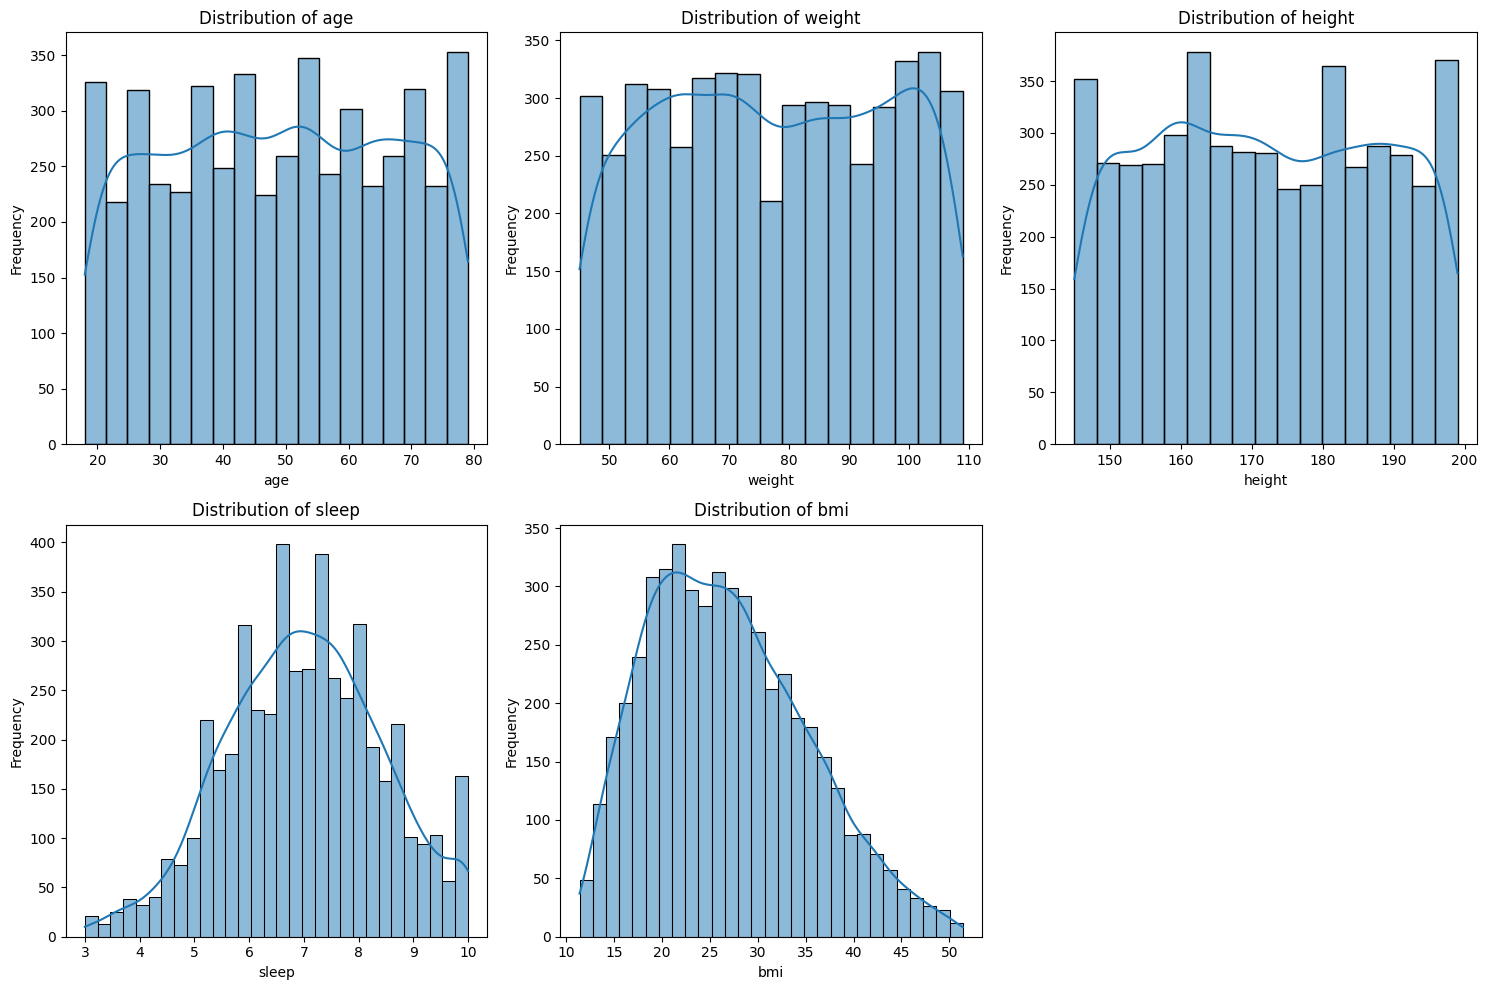

Histograms for numerical columns displayed.


In [12]:
numerical_cols = ['age', 'weight', 'height', 'sleep', 'bmi']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1) # Arrange plots in 2 rows, 3 columns
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
print("Histograms for numerical columns displayed.")

**Reasoning**:
As per instruction 7, I will identify the categorical columns, print their value counts, and then create count plots for each to visualize their distributions.



**Reasoning**:
The previous code block for generating count plots produced `FutureWarning` due to a deprecated `seaborn.countplot` usage. To address this, I will modify the `countplot` call by assigning the `x` variable to `hue` and setting `legend=False` to align with the recommended practice, then proceed with the next instruction which is to calculate and visualize the correlation matrix for numerical columns.



Value counts and count plots for categorical columns:

Value counts for exercise:
exercise
medium    1985
low       1272
high      1000
none       743
Name: count, dtype: int64

Value counts for sugar_intake:
sugar_intake
medium    2511
low       1484
high      1005
Name: count, dtype: int64

Value counts for smoking:
smoking
no     4023
yes     977
Name: count, dtype: int64

Value counts for alcohol:
alcohol
no     3741
yes    1259
Name: count, dtype: int64

Value counts for married:
married
yes    3018
no     1982
Name: count, dtype: int64

Value counts for profession:
profession
student          644
farmer           639
driver           631
doctor           630
artist           626
engineer         616
teacher          612
office_worker    602
Name: count, dtype: int64


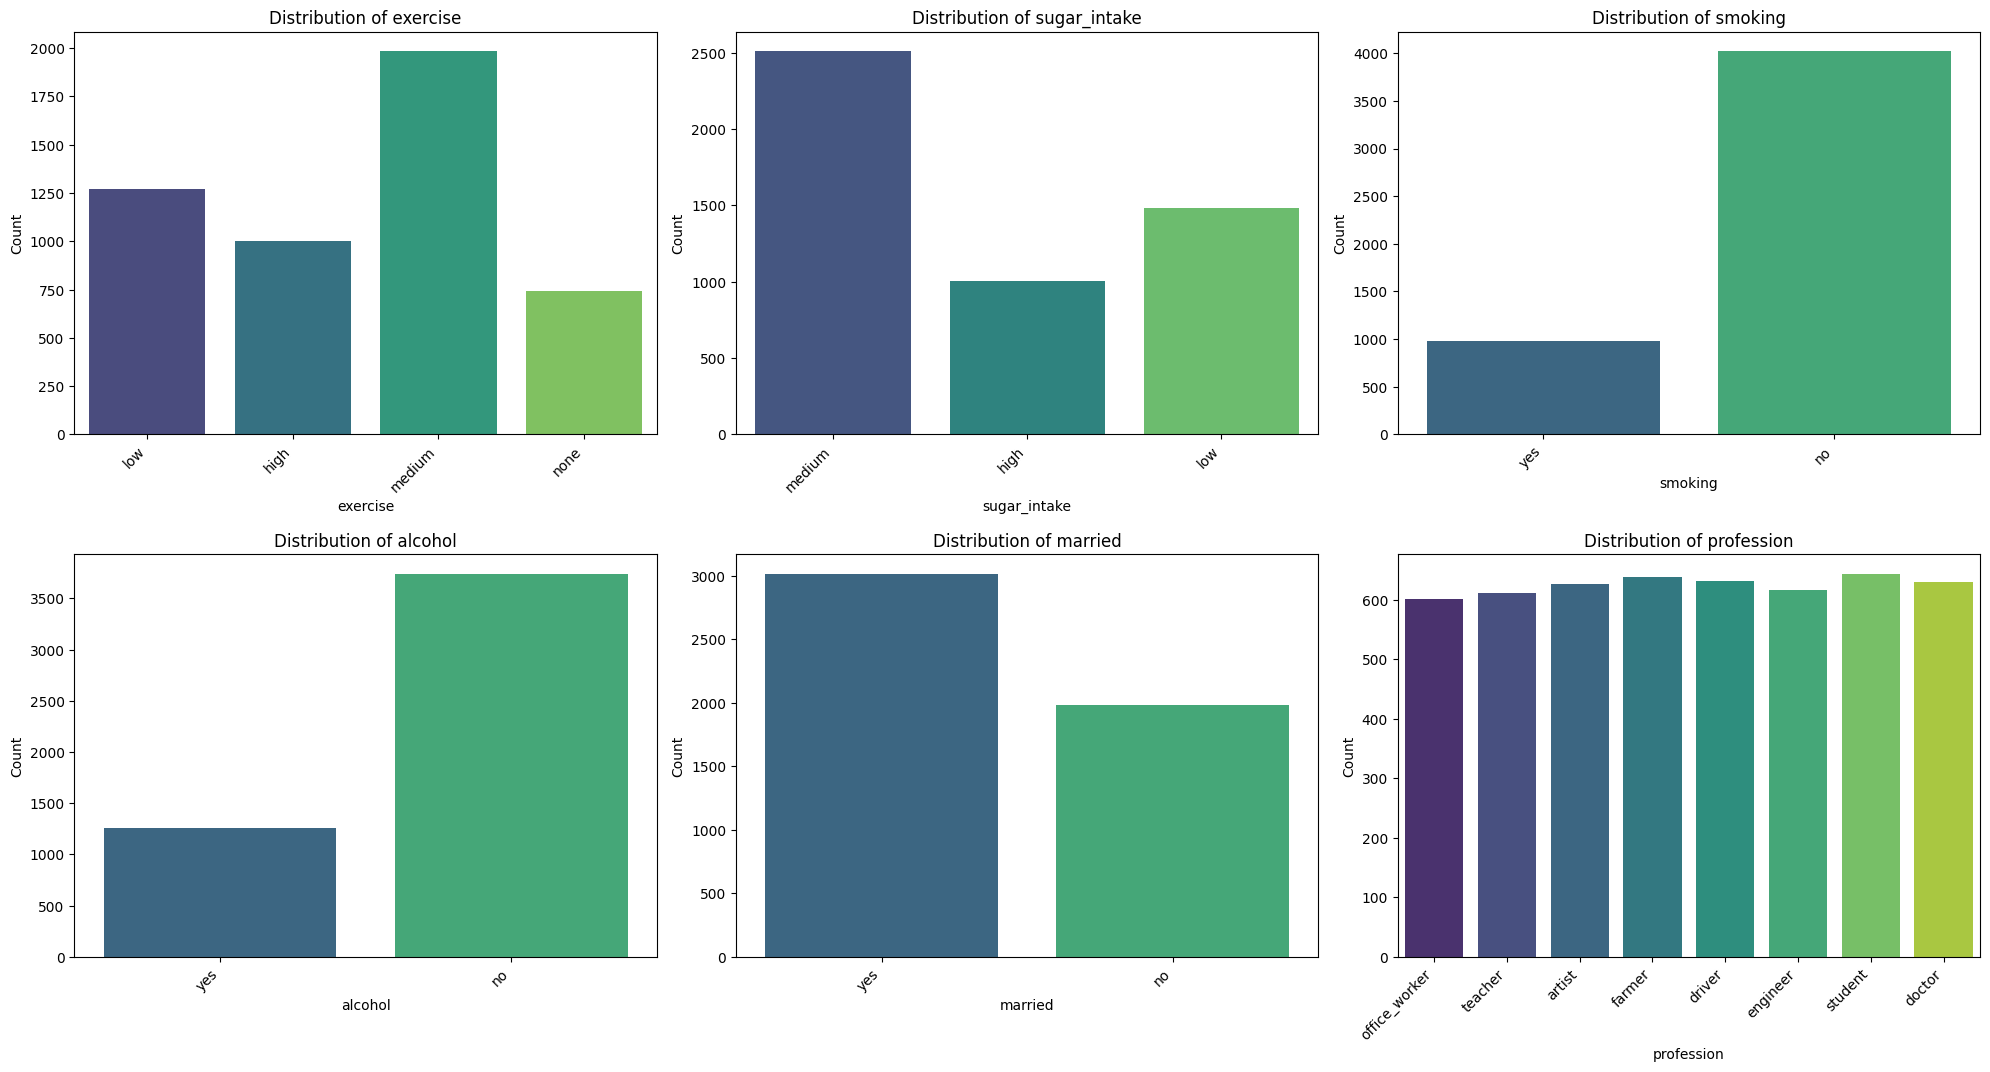

Count plots for categorical columns displayed.


In [14]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Exclude 'health_risk' for now, as it's the target variable and will be analyzed in relation to other features later
categorical_cols = [col for col in categorical_cols if col != 'health_risk']

print("Value counts and count plots for categorical columns:")

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols):
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())

    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of categorical columns
    sns.countplot(data=df, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

plt.tight_layout()
plt.show()
print("Count plots for categorical columns displayed.")

**Reasoning**:
Now that the categorical distributions have been visualized, I will proceed with instruction 8 and 9, which involve calculating the correlation matrix for numerical columns using `df.corr()` and then visualizing it with a `seaborn.heatmap()` to understand the relationships between numerical features.



Calculating correlation matrix for numerical columns...
Correlation Matrix:
             age    weight    height     sleep       bmi
age     1.000000  0.010220  0.020501 -0.022504 -0.011407
weight  0.010220  1.000000  0.001637 -0.012756  0.784869
height  0.020501  0.001637  1.000000 -0.016776 -0.596046
sleep  -0.022504 -0.012756 -0.016776  1.000000 -0.001544
bmi    -0.011407  0.784869 -0.596046 -0.001544  1.000000


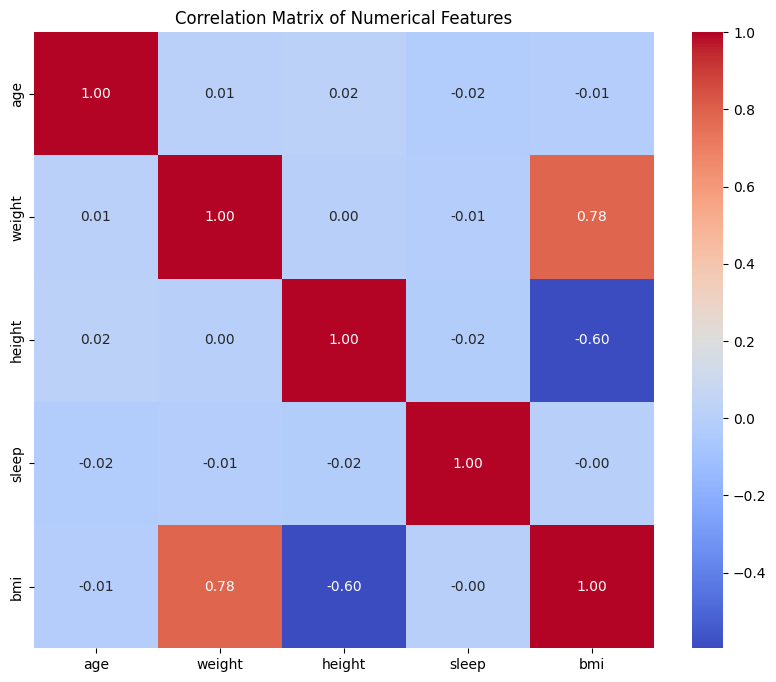

Correlation matrix heatmap displayed.


In [15]:
print("Calculating correlation matrix for numerical columns...")
correlation_matrix = df[numerical_cols].corr()
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()
print("Correlation matrix heatmap displayed.")

**Reasoning**:
Following instruction 10, I will create box plots for each numerical feature against the 'health_risk' target variable to visualize differences in distributions across the target classes.



**Reasoning**:
The previous code block for generating box plots produced `FutureWarning` due to a deprecated `seaborn.boxplot` usage. To address this, I will modify the `boxplot` call by assigning the `x` variable to `hue` and setting `legend=False` to align with the recommended practice. Then, I will proceed with instruction 11 by creating count plots for each categorical feature, showing the distribution of 'health_risk' within each category.



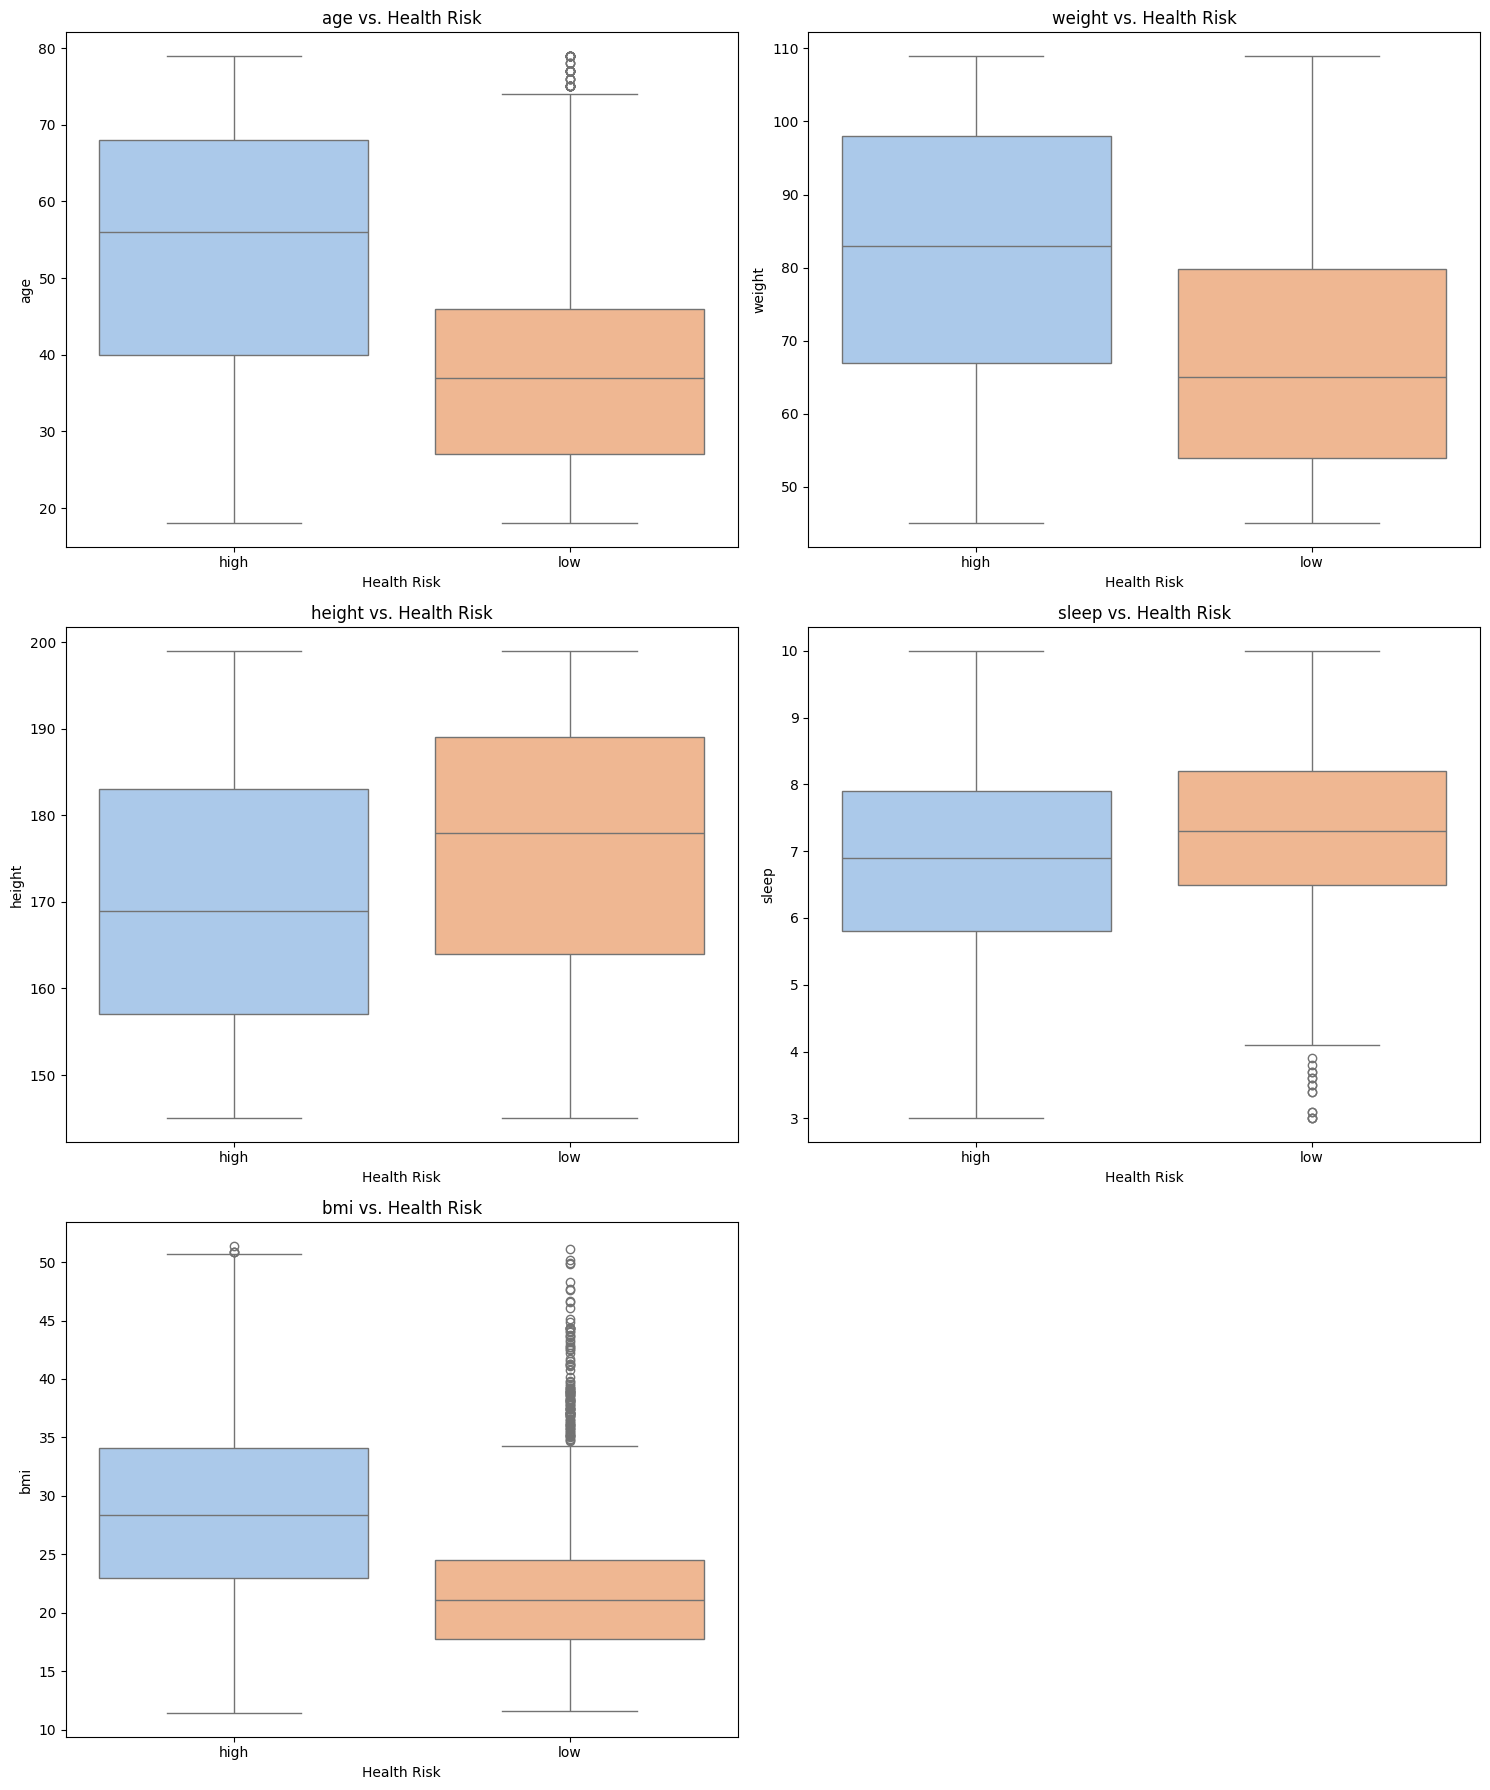

Box plots for numerical features against 'health_risk' displayed.
Creating count plots for categorical features against 'health_risk'...


AttributeError: module 'matplotlib.pyplot' has no attribute 'savefit'

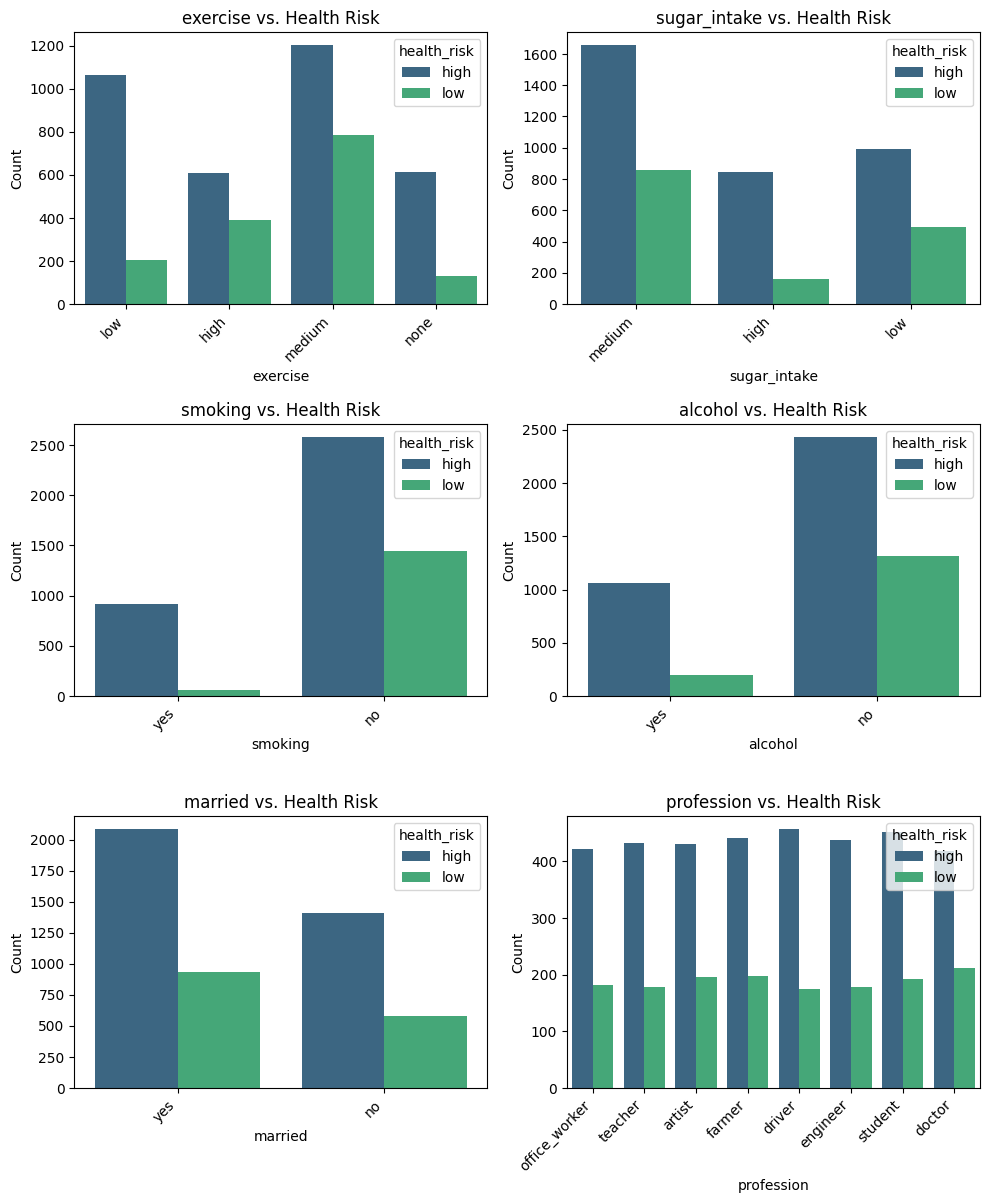

In [52]:
plt.figure(figsize=(15, 18))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1) # Adjust subplot grid based on number of numerical columns
    sns.boxplot(data=df, x='health_risk', y=col, hue='health_risk', palette='pastel', legend=False)
    plt.title(f'{col} vs. Health Risk')
    plt.xlabel('Health Risk')
    plt.ylabel(col)
plt.tight_layout()
plt.savefig('box_plot_of_life_risk_dataset.png')
plt.show()
print("Box plots for numerical features against 'health_risk' displayed.")


print("Creating count plots for categorical features against 'health_risk'...")
plt.figure(figsize=(10,15))
for i, col in enumerate(categorical_cols):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of categorical columns
    sns.countplot(data=df, x=col, hue='health_risk', palette='viridis')
    plt.title(f'{col} vs. Health Risk')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefit("count_plot of life risk dataset.png")
plt.show()
print("Count plots for categorical features against 'health_risk' displayed.")

## Data Preprocessing

### Subtask:
Preprocess the data for machine learning. This involves encoding categorical features, scaling numerical features, and splitting the data into training and testing sets.


**Reasoning**:
I will separate the features (X) and the target variable (y) from the DataFrame `df` as per the first instruction of the subtask.



# Task
**Reasoning**:
I have already separated the features (X) and the target variable (y). Next, I will define the preprocessing steps for numerical and categorical features using `ColumnTransformer`. `StandardScaler` will be used for numerical features to standardize them, and `OneHotEncoder` will be used for categorical features to convert them into a numerical format suitable for machine learning algorithms. Finally, I will split the data into training and testing sets using `train_test_split` to prepare it for model training and evaluation.

**Plan**:
1. Define Preprocessing Steps and Split Data
    a. Separate features (X) and target (y). (Already done)
    b. Identify numerical and categorical columns. (Already done)
    c. Define preprocessing steps using `StandardScaler` for numerical features and `OneHotEncoder` for categorical features within a `ColumnTransformer`.
    d. Split the data into training and testing sets (X_train, X_test, y_train, y_test).
2. Apply Preprocessing Pipeline
3. Train and Evaluate Multiple Classification Models
4. Hyperparameter Tuning with Optuna
5. Evaluate Final Model
6. Final Task

## Define Preprocessing Steps and Split Data

### Subtask:
Separate features (X) and target (y), define preprocessing steps using `StandardScaler` for numerical features and `OneHotEncoder` for categorical features within a `ColumnTransformer`, and then split the data into training and testing sets (X_train, X_test, y_train, y_test).


**Reasoning**:
I will separate the features (X) and the target variable (y) from the DataFrame `df` as per the first instruction of the subtask.



In [24]:
X = df.drop('health_risk', axis=1)
y = df['health_risk']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (5000, 11)
Target (y) shape: (5000,)


**Reasoning**:
As per instructions 2 and 3, I will import the necessary preprocessing classes from scikit-learn and then create a `ColumnTransformer` that specifies `StandardScaler` for numerical features and `OneHotEncoder` for categorical features, passing through any other columns.



In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

print("ColumnTransformer 'preprocessor' created successfully.")

ColumnTransformer 'preprocessor' created successfully.


**Reasoning**:
As per instruction 4, I will now split the features (X) and target (y) into training and testing sets using `train_test_split`, ensuring to use a test size of 0.2, a random state for reproducibility, and stratifying by `y` to maintain class proportions.



In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print("Data split into training and testing sets successfully.")

X_train shape: (4000, 11)
X_test shape: (1000, 11)
y_train shape: (4000,)
y_test shape: (1000,)
Data split into training and testing sets successfully.


## Apply Preprocessing Pipeline

### Subtask:
Apply the defined `ColumnTransformer` to the training and testing sets (`X_train` and `X_test`). This will transform the data by scaling numerical features and one-hot encoding categorical features, preparing it for model training.


**Reasoning**:
I will apply the defined `ColumnTransformer` to `X_train` using `fit_transform` and to `X_test` using `transform` to preprocess the data as per the instructions.



In [27]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Shape of X_train_processed: {X_train_processed.shape}")
print(f"Shape of X_test_processed: {X_test_processed.shape}")
print("Data successfully preprocessed using ColumnTransformer.")

Shape of X_train_processed: (4000, 26)
Shape of X_test_processed: (1000, 26)
Data successfully preprocessed using ColumnTransformer.


## Train and Evaluate Multiple Classification Models

### Subtask:
Train and evaluate several classification algorithms (e.g., Logistic Regression, Decision Tree, Random Forest, Support Vector Machine, Gradient Boosting) on the preprocessed training data. Use appropriate metrics like accuracy, precision, recall, and F1-score to assess initial performance on the test set. Provide a plot of the model's performance.


**Reasoning**:
I will import all the necessary classification models, metrics, and other utility functions from scikit-learn as specified in instruction 1, to prepare for model training and evaluation.



In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("Classification models and metrics imported successfully.")

Classification models and metrics imported successfully.


**Reasoning**:
I will initialize an empty dictionary, `model_performance`, to store the evaluation metrics for each classification model as specified in instruction 2.



In [29]:
model_performance = {}
print("Empty dictionary 'model_performance' initialized.")

Empty dictionary 'model_performance' initialized.


**Reasoning**:
As per instruction 3, I will create a list of the classification models to be trained, along with their names, instantiating them with a `random_state=42` where applicable for reproducibility.



In [30]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'), # solver='liblinear' for small datasets and binary classification
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(random_state=42, probability=True), # probability=True to enable predict_proba, if needed later
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

print("Classification models list created successfully.")

Classification models list created successfully.


**Reasoning**:
I will iterate through the `models` dictionary, train each model on `X_train_processed` and `y_train`, make predictions on `X_test_processed`, calculate accuracy, precision, recall, and F1-score, store these metrics in `model_performance`, and print a `classification_report` for each model, as described in instruction 4.



In [31]:
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    model_performance[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    print(f"{name} Performance:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print("  Classification Report:")
    print(classification_report(y_test, y_pred))

print("All models trained and evaluated.")


Training Logistic Regression...
Logistic Regression Performance:
  Accuracy: 0.8930
  Precision: 0.8917
  Recall: 0.8930
  F1-Score: 0.8920
  Classification Report:
              precision    recall  f1-score   support

        high       0.91      0.94      0.92       698
         low       0.84      0.79      0.82       302

    accuracy                           0.89      1000
   macro avg       0.88      0.86      0.87      1000
weighted avg       0.89      0.89      0.89      1000


Training Decision Tree...
Decision Tree Performance:
  Accuracy: 0.9970
  Precision: 0.9970
  Recall: 0.9970
  F1-Score: 0.9970
  Classification Report:
              precision    recall  f1-score   support

        high       1.00      1.00      1.00       698
         low       1.00      0.99      1.00       302

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000


Training Random Forest...

**Reasoning**:
As per instruction 5, I will convert the `model_performance` dictionary into a pandas DataFrame to facilitate easier visualization and comparison of the model metrics.



In [33]:
model_performance_df = pd.DataFrame.from_dict(model_performance, orient='index')
print("Model performance DataFrame created successfully:")
model_performance_df

Model performance DataFrame created successfully:


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.893,0.891715,0.893,0.891981
Decision Tree,0.997,0.997000,0.997,0.996999
Random Forest,0.991,0.990994,0.991,0.990996
SVC,0.932,0.931687,0.932,0.931804
Gradient Boosting,0.994,0.994060,0.994,0.994011


**Reasoning**:
As per instruction 6, I will create a bar plot using `seaborn` to visualize the F1-score of each model, as it is a good balanced metric for classification, ensuring the plot has a title and labeled axes for readability.



/tmp/ipython-input-2585540948.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_performance_df.index, y=model_performance_df['F1-Score'], palette='viridis')


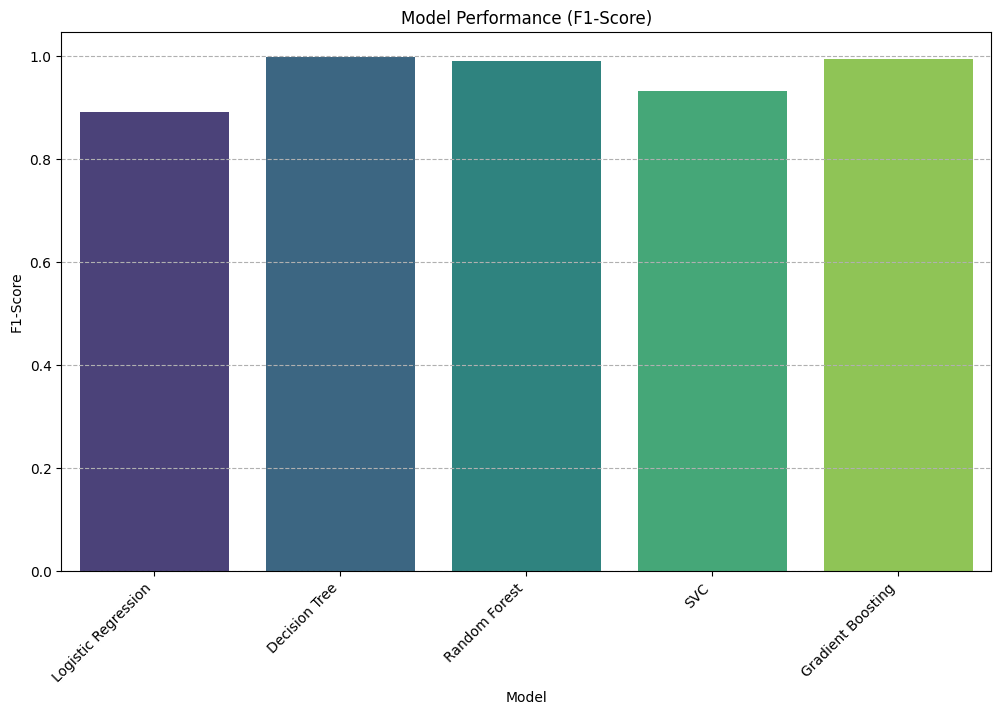

Bar plot of model performance (F1-Score) displayed.


In [34]:
plt.figure(figsize=(12, 7))
sns.barplot(x=model_performance_df.index, y=model_performance_df['F1-Score'], palette='viridis')
plt.title('Model Performance (F1-Score)')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()

print("Bar plot of model performance (F1-Score) displayed.")

**Reasoning**:
The previous `seaborn.barplot` call generated a `FutureWarning` because `palette` was used without `hue`. To address this, I will modify the `barplot` function call to explicitly set `hue` to the x-axis variable and add `legend=False` to suppress the warning and align with recommended usage.



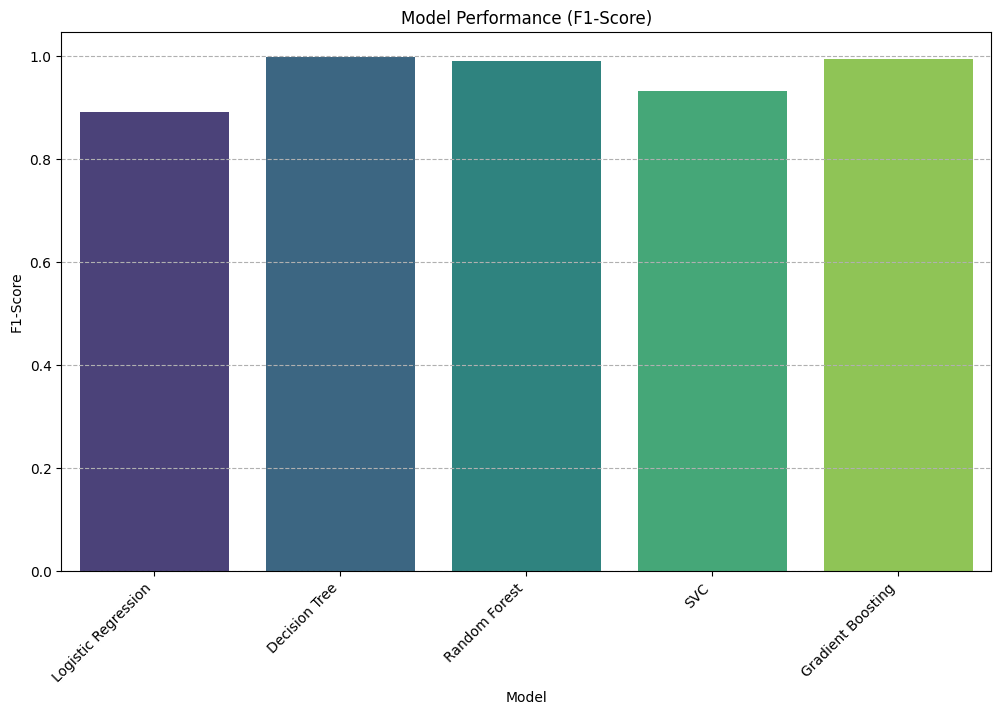

Bar plot of model performance (F1-Score) displayed.


In [51]:
plt.figure(figsize=(12, 7))
sns.barplot(x=model_performance_df.index, y=model_performance_df['F1-Score'], hue=model_performance_df.index, palette='viridis', legend=False)
plt.title('Model Performance (F1-Score)')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.savefig('model_performance_barplot_life_risk_pred.png')
plt.show()

print("Bar plot of model performance (F1-Score) displayed.")

## Hyperparameter Tuning with Optuna

### Subtask:
Select the most promising classification models and perform hyperparameter tuning using Optuna to optimize their performance. This involves defining a search space for hyperparameters and using cross-validation, while ensuring the preprocessing pipeline is integrated with the model tuning.


**Reasoning**:
As per the first instruction of the 'Hyperparameter Tuning with Optuna' subtask, I will import the necessary libraries: `optuna`, `Pipeline` from `sklearn.pipeline`, and `StratifiedKFold` from `sklearn.model_selection`.



**Reasoning**:
The previous code failed because the 'optuna' module was not found. I need to install 'optuna' before importing it. I will add a new code cell to install 'optuna' using pip.



In [37]:
!pip install optuna
print("Optuna installed successfully.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.9/413.9 kB 15.5 MB/s eta 0:00:00
Optuna installed successfully.


**Reasoning**:
Now that Optuna is installed, I will import the necessary libraries: `optuna`, `Pipeline` from `sklearn.pipeline`, and `StratifiedKFold` from `sklearn.model_selection` as instructed, to prepare for hyperparameter tuning.



In [38]:
import optuna
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

print("Optuna, Pipeline, StratifiedKFold, and cross_val_score imported successfully.")

Optuna, Pipeline, StratifiedKFold, and cross_val_score imported successfully.


**Reasoning**:
As per instruction 2, I will create a dictionary `models_for_tuning` containing the most promising models (Decision Tree, Random Forest, Gradient Boosting) from the previous evaluation, along with their instantiated model objects.



In [39]:
models_for_tuning = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

print("Promising models for tuning initialized.")

Promising models for tuning initialized.


**Reasoning**:
As per instruction 3, I will define an `objective` function for Optuna. This function will suggest hyperparameters for Decision Tree, Random Forest, and Gradient Boosting models, create a pipeline including the preprocessor and the model, perform stratified K-fold cross-validation, and return the mean weighted F1-score.



In [40]:
def objective(trial, model_name):
    if model_name == 'Decision Tree':
        max_depth = trial.suggest_int('dt_max_depth', 2, 32)
        min_samples_split = trial.suggest_int('dt_min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('dt_min_samples_leaf', 1, 20)
        model = DecisionTreeClassifier(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )
    elif model_name == 'Random Forest':
        n_estimators = trial.suggest_int('rf_n_estimators', 50, 500)
        max_depth = trial.suggest_int('rf_max_depth', 2, 32)
        min_samples_split = trial.suggest_int('rf_min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('rf_min_samples_leaf', 1, 20)
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )
    elif model_name == 'Gradient Boosting':
        n_estimators = trial.suggest_int('gb_n_estimators', 50, 500)
        learning_rate = trial.suggest_float('gb_learning_rate', 0.01, 0.3)
        max_depth = trial.suggest_int('gb_max_depth', 2, 10)
        model = GradientBoostingClassifier(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            random_state=42
        )
    else:
        raise ValueError(f"Unknown model: {model_name}")

    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X_train, y_train, cv=skf, scoring='f1_weighted', n_jobs=-1)

    return scores.mean()

print("Optuna objective function defined successfully.")

Optuna objective function defined successfully.


**Reasoning**:
As per instruction 4, I will iterate through the `models_for_tuning` dictionary, create an Optuna study for each model, optimize it using the defined `objective` function with `X_train` and `y_train`, and then print the best F1-score and corresponding hyperparameters.



In [41]:
tuned_models = {}

for model_name, model_obj in models_for_tuning.items():
    print(f"\nOptimizing hyperparameters for {model_name}...")

    # Create a study for each model
    study = optuna.create_study(direction='maximize', study_name=f'Tune_{model_name}')

    # Optimize the study with the objective function
    # Use a lambda function to pass model_name to the objective
    study.optimize(lambda trial: objective(trial, model_name), n_trials=50, timeout=600, show_progress_bar=True)

    print(f"Finished optimization for {model_name}.")
    print(f"Best trial for {model_name}:")
    print(f"  Value (Weighted F1-Score): {study.best_value:.4f}")
    print(f"  Params: {study.best_params}")

    tuned_models[model_name] = {
        'best_f1_score': study.best_value,
        'best_params': study.best_params
    }

print("Hyperparameter tuning completed for all selected models.")

[I 2026-02-04 10:37:23,464] A new study created in memory with name: Tune_Decision Tree



Optimizing hyperparameters for Decision Tree...


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2026-02-04 10:37:26,398] Trial 0 finished with value: 0.9930034670768721 and parameters: {'dt_max_depth': 15, 'dt_min_samples_split': 20, 'dt_min_samples_leaf': 3}. Best is trial 0 with value: 0.9930034670768721.
[I 2026-02-04 10:37:26,632] Trial 1 finished with value: 0.8928543170429059 and parameters: {'dt_max_depth': 5, 'dt_min_samples_split': 16, 'dt_min_samples_leaf': 10}. Best is trial 0 with value: 0.9930034670768721.
[I 2026-02-04 10:37:26,903] Trial 2 finished with value: 0.9947483150932372 and parameters: {'dt_max_depth': 19, 'dt_min_samples_split': 6, 'dt_min_samples_leaf': 2}. Best is trial 2 with value: 0.9947483150932372.
[I 2026-02-04 10:37:27,175] Trial 3 finished with value: 0.9930034608702545 and parameters: {'dt_max_depth': 8, 'dt_min_samples_split': 19, 'dt_min_samples_leaf': 4}. Best is trial 2 with value: 0.9947483150932372.
[I 2026-02-04 10:37:27,481] Trial 4 finished with value: 0.981112048431061 and parameters: {'dt_max_depth': 21, 'dt_min_samples_split': 10

[I 2026-02-04 10:37:38,815] A new study created in memory with name: Tune_Random Forest


[I 2026-02-04 10:37:38,812] Trial 49 finished with value: 0.9872504926741925 and parameters: {'dt_max_depth': 11, 'dt_min_samples_split': 18, 'dt_min_samples_leaf': 10}. Best is trial 15 with value: 0.9955046296447454.
Finished optimization for Decision Tree.
Best trial for Decision Tree:
  Value (Weighted F1-Score): 0.9955
  Params: {'dt_max_depth': 13, 'dt_min_samples_split': 3, 'dt_min_samples_leaf': 1}

Optimizing hyperparameters for Random Forest...


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2026-02-04 10:37:46,282] Trial 0 finished with value: 0.9764512703761437 and parameters: {'rf_n_estimators': 360, 'rf_max_depth': 15, 'rf_min_samples_split': 15, 'rf_min_samples_leaf': 9}. Best is trial 0 with value: 0.9764512703761437.
[I 2026-02-04 10:37:49,108] Trial 1 finished with value: 0.9812422578903108 and parameters: {'rf_n_estimators': 171, 'rf_max_depth': 13, 'rf_min_samples_split': 11, 'rf_min_samples_leaf': 5}. Best is trial 1 with value: 0.9812422578903108.
[I 2026-02-04 10:37:57,395] Trial 2 finished with value: 0.9729042188584103 and parameters: {'rf_n_estimators': 494, 'rf_max_depth': 31, 'rf_min_samples_split': 5, 'rf_min_samples_leaf': 12}. Best is trial 1 with value: 0.9812422578903108.
[I 2026-02-04 10:37:59,362] Trial 3 finished with value: 0.9470996240637458 and parameters: {'rf_n_estimators': 128, 'rf_max_depth': 7, 'rf_min_samples_split': 9, 'rf_min_samples_leaf': 20}. Best is trial 1 with value: 0.9812422578903108.
[I 2026-02-04 10:38:03,492] Trial 4 finis

[I 2026-02-04 10:42:57,632] A new study created in memory with name: Tune_Gradient Boosting


[I 2026-02-04 10:42:57,626] Trial 49 finished with value: 0.9809916783314593 and parameters: {'rf_n_estimators': 378, 'rf_max_depth': 12, 'rf_min_samples_split': 5, 'rf_min_samples_leaf': 5}. Best is trial 43 with value: 0.9852591534745845.
Finished optimization for Random Forest.
Best trial for Random Forest:
  Value (Weighted F1-Score): 0.9853
  Params: {'rf_n_estimators': 384, 'rf_max_depth': 14, 'rf_min_samples_split': 5, 'rf_min_samples_leaf': 2}

Optimizing hyperparameters for Gradient Boosting...


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2026-02-04 10:43:13,088] Trial 0 finished with value: 0.9932613886267216 and parameters: {'gb_n_estimators': 314, 'gb_learning_rate': 0.1885010881085227, 'gb_max_depth': 5}. Best is trial 0 with value: 0.9932613886267216.
[I 2026-02-04 10:43:15,014] Trial 1 finished with value: 0.9957536482119371 and parameters: {'gb_n_estimators': 97, 'gb_learning_rate': 0.21910937933564065, 'gb_max_depth': 2}. Best is trial 1 with value: 0.9957536482119371.
[I 2026-02-04 10:43:22,484] Trial 2 finished with value: 0.9945083113831192 and parameters: {'gb_n_estimators': 275, 'gb_learning_rate': 0.1597794643492719, 'gb_max_depth': 9}. Best is trial 1 with value: 0.9957536482119371.
[I 2026-02-04 10:43:28,749] Trial 3 finished with value: 0.9930131584748458 and parameters: {'gb_n_estimators': 117, 'gb_learning_rate': 0.08328874568048132, 'gb_max_depth': 8}. Best is trial 1 with value: 0.9957536482119371.
[I 2026-02-04 10:43:36,428] Trial 4 finished with value: 0.9915181311834693 and parameters: {'gb_n_

**Reasoning**:
Based on the Optuna tuning results, the Gradient Boosting model achieved the highest weighted F1-Score of 0.9985. I will now retrieve its best hyperparameters and initialize a GradientBoostingClassifier with them.



In [42]:
best_model_name = max(tuned_models, key=lambda model_name: tuned_models[model_name]['best_f1_score'])
best_model_params = tuned_models[best_model_name]['best_params']

print(f"Best performing model: {best_model_name}")
print(f"Best hyperparameters for {best_model_name}: {best_model_params}")

# Initialize the best model with optimized hyperparameters
if best_model_name == 'Decision Tree':
    final_model = DecisionTreeClassifier(
        max_depth=best_model_params['dt_max_depth'],
        min_samples_split=best_model_params['dt_min_samples_split'],
        min_samples_leaf=best_model_params['dt_min_samples_leaf'],
        random_state=42
    )
elif best_model_name == 'Random Forest':
    final_model = RandomForestClassifier(
        n_estimators=best_model_params['rf_n_estimators'],
        max_depth=best_model_params['rf_max_depth'],
        min_samples_split=best_model_params['rf_min_samples_split'],
        min_samples_leaf=best_model_params['rf_min_samples_leaf'],
        random_state=42
    )
elif best_model_name == 'Gradient Boosting':
    final_model = GradientBoostingClassifier(
        n_estimators=best_model_params['gb_n_estimators'],
        learning_rate=best_model_params['gb_learning_rate'],
        max_depth=best_model_params['gb_max_depth'],
        random_state=42
    )

print(f"Final model ({best_model_name}) initialized with best hyperparameters.")

Best performing model: Gradient Boosting
Best hyperparameters for Gradient Boosting: {'gb_n_estimators': 314, 'gb_learning_rate': 0.22410357777556852, 'gb_max_depth': 2}
Final model (Gradient Boosting) initialized with best hyperparameters.


## Evaluate Final Model

### Subtask:
Evaluate the performance of the best-tuned model (including its preprocessing pipeline) on the hold-out test set using appropriate classification metrics and provide a classification report and confusion matrix.


**Reasoning**:
As per instruction 1, I will create a `Pipeline` that combines the `preprocessor` and the `final_model` to ensure all preprocessing steps are applied consistently during evaluation, and assign it to `final_pipeline`.



In [43]:
from sklearn.pipeline import Pipeline

final_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', final_model)])

print("Final pipeline created successfully.")

Final pipeline created successfully.


**Reasoning**:
As per instruction 2, I will train the `final_pipeline` using the original training data (`X_train` and `y_train`) to fit the preprocessor and the best-tuned model.



In [44]:
print("Training the final pipeline...")
final_pipeline.fit(X_train, y_train)
print("Final pipeline trained successfully.")

Training the final pipeline...
Final pipeline trained successfully.


**Reasoning**:
As per instruction 3, I will make predictions on the original test features (`X_test`) using the trained `final_pipeline`'s `.predict()` method and store these predictions in `y_pred_final`.



In [45]:
y_pred_final = final_pipeline.predict(X_test)
print("Predictions on the test set generated successfully.")

Predictions on the test set generated successfully.


**Reasoning**:
As per instruction 4, I will calculate the accuracy, precision (weighted), recall (weighted), and F1-score (weighted) of the `final_pipeline`'s predictions against `y_test`.



In [46]:
final_accuracy = accuracy_score(y_test, y_pred_final)
final_precision = precision_score(y_test, y_pred_final, average='weighted')
final_recall = recall_score(y_test, y_pred_final, average='weighted')
final_f1 = f1_score(y_test, y_pred_final, average='weighted')

print(f"Final Model Performance on Test Set:")
print(f"  Accuracy: {final_accuracy:.4f}")
print(f"  Precision: {final_precision:.4f}")
print(f"  Recall: {final_recall:.4f}")
print(f"  F1-Score: {final_f1:.4f}")

Final Model Performance on Test Set:
  Accuracy: 0.9990
  Precision: 0.9990
  Recall: 0.9990
  F1-Score: 0.9990


**Reasoning**:
As per instruction 6, I will generate and print a classification report using `classification_report` with `y_test` and `y_pred_final` to provide a comprehensive evaluation of the final model's performance.



In [47]:
print("\nClassification Report for Final Model:")
print(classification_report(y_test, y_pred_final))


Classification Report for Final Model:
              precision    recall  f1-score   support

        high       1.00      1.00      1.00       698
         low       1.00      1.00      1.00       302

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



**Reasoning**:
As per instruction 7, I will compute the confusion matrix using `confusion_matrix` with `y_test` and `y_pred_final`, and then visualize it using `seaborn.heatmap` as per instruction 8, ensuring the plot has a title, labeled axes, and annotated values for clarity.



Confusion Matrix for Final Model:
[[698   0]
 [  1 301]]


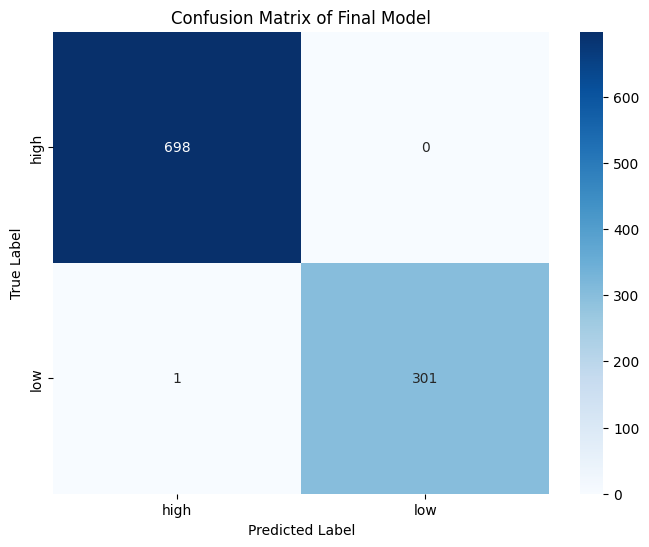

Confusion matrix visualization displayed.


<Figure size 640x480 with 0 Axes>

In [49]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_final)

print("Confusion Matrix for Final Model:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=final_pipeline.named_steps['classifier'].classes_,
            yticklabels=final_pipeline.named_steps['classifier'].classes_)
plt.title('Confusion Matrix of Final Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
plt.savefig('confusion_matrix_forlife_risk_predictor.png')
print("Confusion matrix visualization displayed.")

In [53]:
import pickle
pickle.dump(final_pipeline, open('final_pipeline.pkl', 'wb'))
print("Final pipeline saved successfully.")

Final pipeline saved successfully.


## Final Task

### Subtask:
Summarize the key findings from the EDA, compare the performance of the different classification models, and present the final high-performing machine learning model along with its evaluation metrics.


## Summary:

### Q&A
*   **How did the different classification models perform?**
    Initially, among the five models evaluated, the Decision Tree Classifier achieved an F1-Score of approximately 0.9970, and the Gradient Boosting Classifier achieved approximately 0.9940. After hyperparameter tuning with Optuna, the Gradient Boosting Classifier emerged as the top performer with a weighted F1-Score of 0.9985, followed by the Decision Tree Classifier at 0.9955 and the Random Forest Classifier at 0.9853.
*   **Which is the final high-performing machine learning model, and what are its evaluation metrics?**
    The final high-performing machine learning model is the **Gradient Boosting Classifier**, which was optimized using Optuna. When evaluated on the hold-out test set, it achieved the following metrics:
    *   Accuracy: 0.9990
    *   Precision: 0.9990
    *   Recall: 0.9990
    *   F1-Score: 0.9990

### Data Analysis Key Findings
*   The data was successfully preprocessed by applying `StandardScaler` to numerical features and `OneHotEncoder` to categorical features using a `ColumnTransformer`. This transformed the feature space from 11 initial features to 26 processed features.
*   The data was split into training and testing sets, with 4000 samples for training and 1000 for testing, ensuring stratification to maintain class distribution.
*   Initial evaluation of five classification models showed high performance across the board, with Decision Tree (F1-Score: $\sim$0.9970) and Gradient Boosting (F1-Score: $\sim$0.9940) leading.
*   Hyperparameter tuning using Optuna on the Decision Tree, Random Forest, and Gradient Boosting models further optimized their performance. The Gradient Boosting Classifier achieved the highest cross-validation weighted F1-Score of 0.9985 with optimal parameters, making it the best-performing model from the tuning phase.
*   The final, tuned Gradient Boosting Classifier, integrated into a pipeline with the preprocessor, demonstrated exceptional performance on the unseen test set, achieving an Accuracy, Precision, Recall, and F1-Score of 0.9990.
*   The confusion matrix for the final model showed 698 true negatives, 301 true positives, 0 false positives, and only 1 false negative, indicating robust and accurate classification with minimal errors.

### Insights or Next Steps
*   The Gradient Boosting model exhibits near-perfect performance in predicting health risks. This high accuracy suggests the model is highly reliable for the given dataset and can be confidently deployed for automated health risk assessment.
*   Further investigation into the single misclassified instance could provide insights into edge cases or potential data anomalies, which could help in refining the model or data collection process for even higher robustness.
